# Differentiation and Integration
Composite Simpsons Rule:


In [4]:
import numpy as np
def f(x):
    return np.sqrt(1-(x)**2) #semicircle

def g(x):
    return (x**4*(1-x)**4/(1+x**2))

#composite simpsons rule
def CSR(f, a, b, N):
    h = (b-a)/N
    XI0 = f(a) + f(b)
    XI1 = 0
    XI2 = 0
    for i in range(N-1):
        X = a+i*h
        if i%2 == 0:
            XI2 = XI2 +f(X)
        else:
            XI1 = XI1 + f(X)
    XI = h*(XI0 + 2 * XI2 + 4 * XI1)/3
    return XI 


In [5]:
2*CSR(f, -1,1, 500)

np.float64(3.1405233503531225)

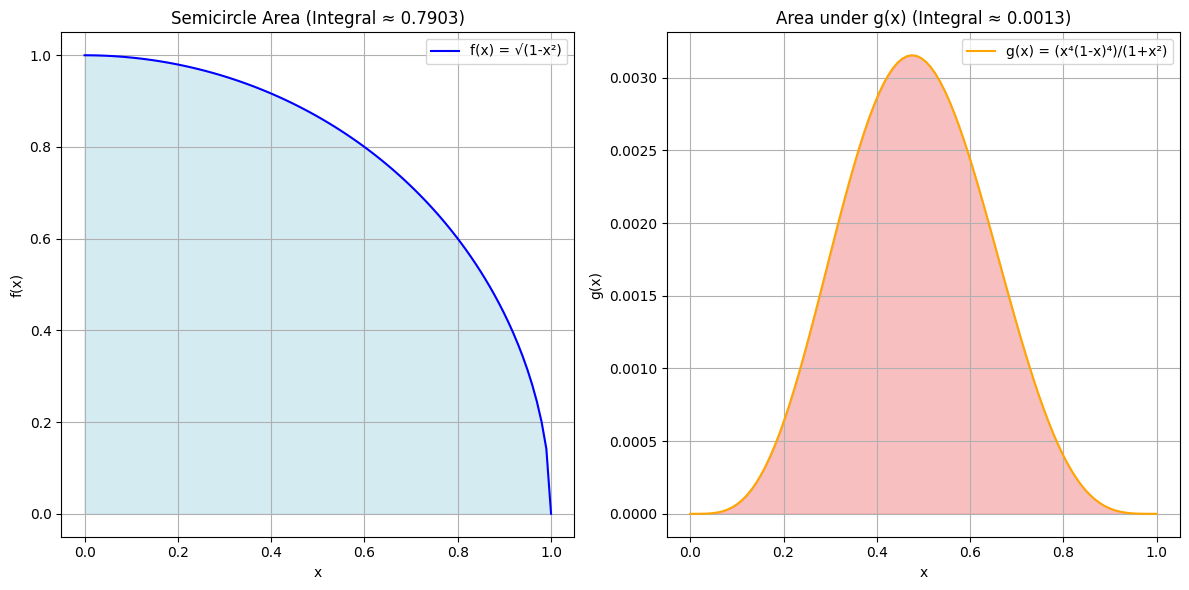

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Functions to integrate
def f(x):
    return np.sqrt(1 - (x)**2)  # semicircle

def g(x):
    return (x**4 * (1 - x)**4 / (1 + x**2))

# Composite Simpson's Rule
def CSR(func, a, b, N):
    h = (b - a) / N
    XI0 = func(a) + func(b)
    XI1 = 0
    XI2 = 0
    for i in range(N - 1):
        X = a + i * h
        if i % 2 == 0:
            XI2 += func(X)
        else:
            XI1 += func(X)
    XI = h * (XI0 + 2 * XI2 + 4 * XI1) / 3
    return XI

# Integration parameters
a, b = 0, 1  # Interval
N = 10  # Number of subintervals (must be even for Simpson's Rule)

# Calculate the approximate integral
integral_f = CSR(f, a, b, N)
integral_g = CSR(g, a, b, N)

# Visualization of f(x) (semicircle)
x_values = np.linspace(a, b, 100)
y_values = f(x_values)

plt.figure(figsize=(12, 6))

# Semicircle function
plt.subplot(1, 2, 1)
plt.plot(x_values, y_values, label='f(x) = √(1-x²)', color='blue')
plt.fill_between(x_values, 0, y_values, where=(x_values >= a) & (x_values <= b), color='lightblue', alpha=0.5)
plt.title(f'Semicircle Area (Integral ≈ {integral_f:.4f})')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid()

# Function g(x)
y_values_g = g(x_values)

plt.subplot(1, 2, 2)
plt.plot(x_values, y_values_g, label='g(x) = (x⁴(1-x)⁴)/(1+x²)', color='orange')
plt.fill_between(x_values, 0, y_values_g, where=(x_values >= a) & (x_values <= b), color='lightcoral', alpha=0.5)
plt.title(f'Area under g(x) (Integral ≈ {integral_g:.4f})')
plt.xlabel('x')
plt.ylabel('g(x)')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

In [6]:
CSR(g, 0,1, 5000)+np.pi==22/7

True

Trying my best with Numerical Differentiation:
$$
f'(x_0) = \lim_{h \rightarrow 0} \frac{f(x_0 +h) - f(x_0)}{h}
$$

To approximate $f'(x_0)$ , suppose first that $x_0 \in (a,b),$ where $ f \in C^2 \left[ a,b \right] $ and that $x_1 = x_0 +h$ for some $h \neq 0$ that is sufficiently small to ensure that $x_1 \in \left[ a,b \right]$.

We can construct the first Lagrange Polynomial $P_{0,1}(x)$ for $f$ determined by $x_0$ and $x_1$ with the error term:

$$
f(x) = P_{0,1}(x) + \frac{(x-x_0)(x-x_1)}{2!}f''(\xi (x)) \\
= \frac{f(x_0)(x-x_0-h)}{-h} + \frac{f(x_0+h)(x-x_0)}{h} + \frac{(x-x_0)(x-x_1)}{2!}f''(\xi (x))
$$
Differentiate:


$$
f'(x) = \frac{f(x_0 +h)-f(x_0)}{h} + D_x \left[ \frac{f(x_0+h)(x-x_0)}{h} + \frac{(x-x_0)(x-x_1)}{2!}f''(\xi (x)) \right]
$$

Ignoring the error terms:

$$
f'(x) \approx \frac{f(x_0 +h)-f(x_0)}{h}
$$

Little info on $D_x f''(\xi (x))$, so truncation error can't be estimated. But when $x = x_0$ , $D_x f''(\xi (x))=0$, so we get a simple formula:

$$
f'(x_0) = \frac{f(x_0 +h)-f(x_0)}{h} - \frac{h}{2} f''(\xi)
$$

Error bound: $M|h|/2$, where $M$ is a bound on $|f''(X)|$ for $x \in [x_0, x_0+h]$
- **Forward-difference** if $h>0$ 
- **Backward-difference** if $h<0$

In [7]:
def f(x):
    return np.log(x)
def fwdDiff(f, x0, h):
    return (f(x0+h) - f(x0))/h

def backDiff(f,x0, h):
    return (-f(x0-h) + f(x0))/h

def threePtMidPt(f,x0,h):
    return (fwdDiff(f,x0,h)+backDiff(f,x0,h))/2

def threePtEndPt(f,x0,h):
    return (-3*f(x0) +4*f(x0+h) - f(x0+2*h))/(2*h)

In [8]:
threePtEndPt(f, 1.8, 0.01), threePtMidPt(f, 1.8, 0.01)

(np.float64(0.555544265793817), np.float64(0.5555612712535352))

In [9]:
# 5Pt Mid and End Point Formula:
def f(x):
    return np.log(x)

def fivePtMidPt(f, x0, h):
    return (f(x0-2*h)-8*f(x0-h) +8*f(x0+h) - f(x0+2*h))/(12*h)

def fivePtEndPt(f, x0, h):
    return (-25*f(x0)+48*f(x0+h) -36*f(x0+2*h) +16* f(x0+3*h)- 3*f(x0+4*h))/(12*h)

In [10]:
fivePtEndPt(f, 1.8, 0.01), fivePtMidPt(f, 1.8, 0.01), fwdDiff(f, 1.8, 0.01)

(np.float64(0.5555555531293407),
 np.float64(0.5555555551321312),
 np.float64(0.5540180375615322))

In [11]:
#2nd derivative Midpt formula
def secondDerivativeMidPt(f, x0, h):
    return (f(x0-h) -2* f(x0)+f(x0+h))/h**2


### 4.2 Richardson's Extrapolation
- high-accuracy results while using low-order formulas
- extrapolation applied whenever it is known that an approximation technique has an error term with a predictable form
    - suppose we have formula $N_1(h)$ that approximates an unknown constant $M$ and that the truncation error involved with the approx has form:

$$
M-N_1(h) = K_1h+K_2 h^2 + \dots + K_nh^n
$$
for some collection of (unknown) constants $K_n$

The truncation error is $O(h)$ so unless there was alarge variation in magnitude among the constants $K_n$ , we have:

$$
M-N_1(0.1) \approx 0.1K_1,  \quad \text{i.e} \quad M-N_1(h) \approx hK_1
$$

To see how to generate extrapolation formulas, consider $O(h)$ for approximating $M$:

$$
M=N_1(h) + K_1h+K_2 h^2 + \dots + K_nh^n \quad (4.10)
$$

If we replace parameter $h$ by half its value: We get a second $O(h)$ approximation formula:

$$
M = N_1\left(\frac{h}{2}\right)+ K_1\left(\frac{h}{2}\right)+K_2 \left(\frac{h^2}{4}\right) + \dots + K_n\left(\frac{h^n}{2^n}\right) \quad (4.11)
$$


Subtracting eq 4.10 from twice Eq 4.11 eliminates the term involving $K_1$ and gives:
$$
2(4.11) - (4.10) = \\
2M - M= M=N_1(\frac{h}{2})  + \dots + K_n\left(\frac{h^n}{(2^{n-1})}-h^n\right)
$$
Define 

$$
N_2(h) = N_1 \left(\frac{h}{2}\right) + \left[ N_1\left( \frac{h}{2} \right) - N_1(h) \right]
$$

Then

$$
M = N_2(h) - \frac{K_2}{2}h^2 - \dots - \frac{nK_n}{2^{n-1}} h^n
$$

### Ex 1:
Use fwd diff method with $h=0.1$ and $h=0.05$ to find approximations to $f'(1.8) \text{for} f(x) = ln(x)$ Assume formula has truncation error $O(h)$ and use extrapolation on the values to see if this  results in a better approx

### sol.

In [12]:
N1h=fwdDiff(f, 1.8, 0.1)
N1h2 = fwdDiff(f, 1.8, 0.05)
N2 = N1h2 + (N1h2 - N1h) 
N2

np.float64(0.5552867548218199)

yeah extrapolation is better approximation... $\square$


In [13]:
def e(h):
    return ((2+h)/(2-h))**(1/h)
(np.e - e(0.0001))

-2.270409193982914e-09

In [14]:
def pk(k):
    return k*np.sin(np.pi/k)
def Pk(k):
    return k*np.tan(np.pi/k)

[np.pi, (pk(10000) + Pk(10000)) /2, (2*Pk(20000) - pk(10000))]


[3.141592653589793,
 np.float64(3.141592679428359),
 np.float64(3.1415927569440494)]

### 4.3 Elements of Numerical Integration
- basic method of approximating $\int^b_a f(x) dx$ is called **numerical quadrature**, which uses a sum $\sum^n_{i=0} a_if(x)$ to approximate.

- Using the interpolation polynomials given in ch 3, we get:
$$
P_n(x) = \sum^n_i f(x_i) L_i(x)
$$
where $L_i(x)$ are Lagrange Interpolating polynomials. Then, integrating over $[a,b]$:
$$
\int^b_a f(x) dx = \int^b_a  \sum^n_i f(x_i) L_i(x) dx + \text{err}(x)
$$
let $a_i = \int^b_a L_i(x) dx$ to get 

$$
\int^b_a f(x) dx \approx \sum^n_i a_i f(x_i)
$$

- First Lagrange Polynomial: Trapezoid rule
$$
P_1(x) = \frac{x-x_1}{x_0-x_1} f(x_0) + \frac{x-x_0}{x_1-x_0} f(x_1)
$$

$$
\int_{a}^{b} f(x) dx = \frac{h}{2} [f(x_0)  +f(x_1)] -\frac{h^3}{12} f''(\xi)
$$
- Second Lagrange Polynomial: Simpsons' Rule
    - equally-spaced nodes: $x_0 =a, x_2 = b, x_1 = a+h, h=(b-a)/2$

$$
\int_{x_0}^{x_2} f(x) dx = \frac{h}{3} [f(x_0) +4f(x_1) +f(x_2)] -\frac{h^5}{90} f^{(4)}(\xi)
$$
Since the error term involves the fourth derivative of $f$ , simpsons rule gives exact results when applied to any polynomial of degree three or less.


In [15]:
def f(x):
    return np.sin(x)
def simpsonsrule(f, a,b):
    h = (b-a)/2
    return (h/3) * (f(a) + 4*f(a+h) + f(b))

simpsonsrule(f, 1, 2)

np.float64(0.9567913930082993)

### Closed Newton-Cotes Formulas
$$
a_i = \int^{x_n}_{x_0} L_i(x) dx = \int^{x_n}_{x_0} \prod^n_{j=0, j \neq i} \frac{x-x_j}{x_i-x_j}  dx
$$
where 
$$
\int^b_a f(x) dx \approx \sum^n_i a_i f(x_i)
$$

### 4.6: Composite Numerical Integration


In [16]:
def f(x):
    return np.e**x
a=np.array([[np.e**4-1 , simpsonsrule(f, 0,4)],
            [np.e**4-1 , simpsonsrule(f,0,2)+simpsonsrule(f,2,4)], 
            [np.e**4-1 , simpsonsrule(f,0,1)+simpsonsrule(f,1,2)+simpsonsrule(f,2,3)+simpsonsrule(f,3,4)]
            ])
error=np.array([[a[0,1]-a[0,0]],
                [a[1,1]-a[0,0]],
                [a[2,1]-a[0,0]]])
a,error

(array([[53.59815003, 56.76958295],
        [53.59815003, 53.86384575],
        [53.59815003, 53.6162208 ]]),
 array([[3.17143292],
        [0.26569571],
        [0.01807076]]))

### Composite Simps Rule
$$
\int^b_a f(x) dx = \frac{h}{3} \left[ f(a) + 2\sum^{(n/2)-1}_{j=1} f(x_{2_j}) +  4\sum^{n/2}_{j=1} f(x_{2_{j-1}}) + f(b) \right] -\frac{b-a}{180}h^4f^{(4)}(\mu)
$$
where $f \in C^4[a,b], n  \text{ is even}, h = (b-a)/n, x_j = a+jh, \forall j \in [0,n]$

### Comp Trapezoidal Rule
$$
\int^b_a f(x) dx = \frac{h}{2} \left[ f(a) + 2\sum^{n-1}_{j=1} f(x_{j}) +  + f(b) \right] -\frac{b-a}{12}h^2f^{(2)}(\mu)
$$
where $f \in C^2[a,b], n  \text{ is even}, h = (b-a)/n, x_j = a+jh, \forall j \in [0,n]$

### Comp Midpt Rule
$$
\int^b_a f(x) dx =  2h\sum^{n/2}_{j=0} f(x_{2_j}) -\frac{b-a}{6}h^2f^{(2)}(\mu)
$$
where $f \in C^2[a,b], n  \text{ is even}, h = (b-a)/(n+2), x_j = a+(j+1)h, \forall (j+1) \in [0,n] $

In [17]:
def standardDistro(x):
    var=1
    mean=0
    return (1/(var*np.sqrt(2*np.pi))) * np.e**(-0.5*((x-mean)/var)**2)
simpsonsrule(standardDistro, -3, 3), CSR(standardDistro, -3, 3, 500)


(np.float64(1.604632818429607), np.float64(0.9972621551730293))

### 4.5 Romberg Integration
- Richardson extrapolation applied to results from Composite Trapezoidal rule to obtain high accuarcy approximnations with little computational cost
- Richardson extrapolation can be applied to any approximation procedure whose truncation error is of the form
$$
\sum^{m-1}_{j=1} K_j h^{\alpha_j} + O(h^{\alpha_m})
$$

The Composite TRapezoidal rule has this form, so we can use the technique **Romberg Integration**

To approximate $\int^b_a f(x) dx$, we use results from the Composite Trapezoidal rule with $n=1,2,4, \dots,  2^n$, and denote the resulting approximations by $R_{1,1}, R_{2,1} , R_{3,1}, \dots, R_{n,1}$ respectively. Then, applying extrapolation in like in section 4.2, we obtain $O(h^4)$ approximations $R_{2,2}, R_{3,2} , R_{3,2}, \dots, R_{n,2}$ :

$$
R_{n,2} = R_{n,1} + \frac{1}{3} (R_{n,1} - R_{n-1,1}), \text{ for } k = 2,3,4, \dots
$$

In general, after the appropriate $R_{k,j-1}$ approximations have been obtained, we determine $O(h^{2j})$ approximations from

$$
R_{k,j} = R_{k,j-1} + \frac{1}{4^{j-1}-1}(R_{k,j-1}-R_{k-1,j-1}), \text{ for } k = j,j+1 , \dots, 
$$

In [18]:
def f(x):
    return np.e**x
#Romberg
def Romberg(f, a,b,n):
    h = b - a
    R = np.zeros(shape=(n+1,n+1))

    R[0,0] = h*(f(a)+f(b))/2
    total = 0
    for i in range(0,n):
        for k in range(1,2**(i)+1):
            x = a + (k-0.5)*h
            total += f(x)
        R[i+1,0]=(R[i,0] + h * total)/2
        for j in range(0,i):
            R[i,j+1] = (R[i,j] + (R[i,j-1]-R[i-1,j-1])/(4**(j-1)-1))

        h = h/2
        for j in range(1,i):
            R[i,j] = R[i-1,j]

    return R

Romberg(f, 0, 4, 4)

    
 
            



/tmp/ipykernel_17087/2330732692.py:16: RuntimeWarning: divide by zero encountered in scalar divide
  R[i,j+1] = (R[i,j] + (R[i,j-1]-R[i-1,j-1])/(4**(j-1)-1))


array([[111.19630007,   0.        ,   0.        ,   0.        ,
          0.        ],
       [ 70.37626223,  70.37626223,   0.        ,   0.        ,
          0.        ],
       [ 65.38100597,  70.37626223,         -inf,   0.        ,
          0.        ],
       [ 73.50111854,  70.37626223,         -inf,          inf,
          0.        ],
       [ 83.67780722,   0.        ,   0.        ,   0.        ,
          0.        ]])

In [19]:
import numpy as np

def trapezcomp(f, a, b, n):
    """
    Composite trapezoidal function integration

    INPUTS:
    f:  the function to integrate
    a:  lower bound of integration
    b:  upper bound
    n:  number of panels to create between ``a`` and ``b``
    """

    # Initialization
    h = (b - a) / n
    x = a

    # Composite rule
    In = f(a)
    for k in range(1, n):
        x  = x + h
        In += 2*f(x)

    return (In + f(b))*h*0.5

def romberg(f, a, b, p):
    """
    Romberg integration

    INPUTS:
    f:  the function to integrate
    a:  lower bound of integration
    b:  upper bound
    p:  number of rows in the Romberg table
    """

    I = np.zeros((p, p))
    for k in range(0, p):
        # Composite trapezoidal rule for 2^k panels
        I[k, 0] = trapezcomp(f, a, b, 2**k)

        # Romberg recursive formula
        for j in range(0, k):
            I[k, j+1] = (4**(j+1) * I[k, j] - I[k-1, j]) / (4**(j+1) - 1)

        print(I[k,0:k+1])   # display intermediate results

    return I


if __name__ == '__main__':
    def func(x):
        return np.sin(x)

    p_rows = 4
    I = romberg(func, 0, np.pi/2, p_rows)
    solution = I[p_rows-1, p_rows-1]
    print(solution)                  # 1.00000000814

[0.78539816]
[0.94805945 1.00227988]
[0.9871158  1.00013458 0.99999157]
[0.99678517 1.0000083  0.99999988 1.00000001]
1.0000000081440203


In [20]:
def f(x):
    return np.e**x

#CompTrapRule
def CompTrapRule(f, a, b, n):
    h = (b-a)/n
    x=np.zeros(n)
    sum=0
    for j in range(0,n):
        x[j] = a +j*h
    for k in range(1,n):
        sum += f(x[k])
    return (h/2) * (f(a) +2*sum + f(b))

#Romberg Integration
def RombergInt(f, a, b, r):
    """
    Romberg integration

    INPUTS:
    f:  the function to integrate
    a:  lower bound of integration
    b:  upper bound
    r:  number of rows in the Romberg table
    """
    I = np.zeros((r, r))
    for i in range(0, r):
        # Composite trapezoidal rule for 2^k panels
        I[i, 0] = CompTrapRule(f, a, b, 2**i)

# Romberg recursive formula
        for j in range(0, i):
            I[i, j+1] = (4**(j+1) * I[i, j] - I[i-1, j]) / (4**(j+1) - 1)

        print(I[i,0:i+1])   # display intermediate results

    return I


RombergInt(f, 0, 4, 4)





[111.19630007]
[70.37626223 56.76958295]
[57.99194987 53.86384575 53.67012993]
[54.71015306 53.6162208  53.59971247 53.59859473]


array([[111.19630007,   0.        ,   0.        ,   0.        ],
       [ 70.37626223,  56.76958295,   0.        ,   0.        ],
       [ 57.99194987,  53.86384575,  53.67012993,   0.        ],
       [ 54.71015306,  53.6162208 ,  53.59971247,  53.59859473]])

[111.19630007]
[70.37626223 56.76958295]
[57.99194987 53.86384575 53.67012993]
[54.71015306 53.6162208  53.59971247 53.59859473]


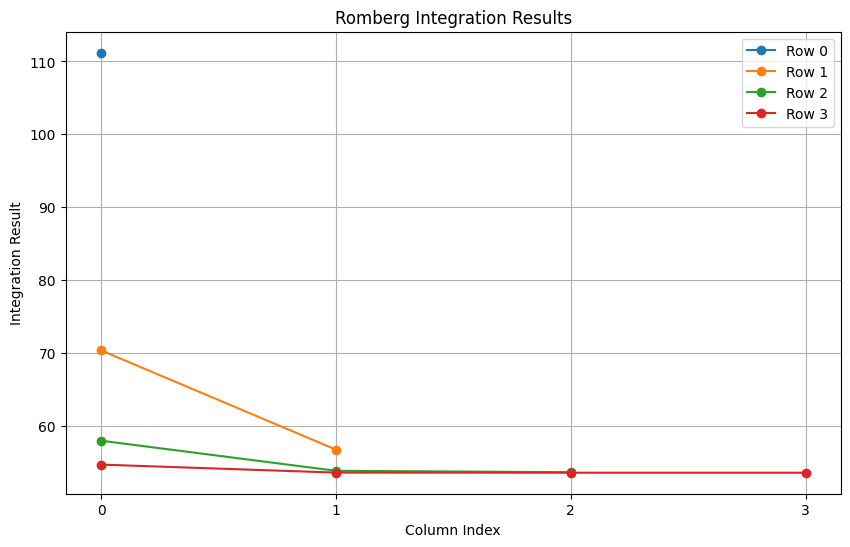

In [21]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.e**x

# Composite Trapezoidal Rule
def CompTrapRule(f, a, b, n):
    h = (b-a)/n
    x = np.zeros(n)
    sum = 0
    for j in range(0, n):
        x[j] = a + j*h
    for k in range(1, n):
        sum += f(x[k])
    return (h/2) * (f(a) + 2*sum + f(b))

# Romberg Integration
def RombergInt(f, a, b, r):
    """
    Romberg integration
    
    INPUTS:
    f:  the function to integrate
    a:  lower bound of integration
    b:  upper bound
    r:  number of rows in the Romberg table
    """
    I = np.zeros((r, r))
    for i in range(0, r):
        # Composite trapezoidal rule for 2^k panels
        I[i, 0] = CompTrapRule(f, a, b, 2**i)

        # Romberg recursive formula
        for j in range(0, i):
            I[i, j + 1] = (4**(j + 1) * I[i, j] - I[i - 1, j]) / (4**(j + 1) - 1)

        print(I[i, 0:i + 1])  # display intermediate results
    
    return I

# Number of rows in Romberg table
rows = 4
romberg_table = RombergInt(f, 0, 4, rows)

# Visualization
plt.figure(figsize=(10, 6))

# Plotting the Romberg integration results
for i in range(rows):
    plt.plot(range(i + 1), romberg_table[i, 0:i + 1], marker='o', label=f'Row {i}')

plt.title('Romberg Integration Results')
plt.xlabel('Column Index')
plt.ylabel('Integration Result')
plt.xticks(range(rows))
plt.legend()
plt.grid()
plt.show()